### Customer Segmentation
#### 0. Packages and datasets setup
#### 1. Data Inspection
#### 2. Handle Missing Values
#### 3. Handle Skewness of Data
#### 4. Feature Engineering
#### 5. Check Correlation Between Features
#### 6. Reduce Dimension (PCA)
#### 6. Segmentation Models
- **K-Means**: Fast and widely used, good for well-separated clusters.
- **DBSCAN**: Great for detecting clusters of varying shapes and handling noise.
- **Gaussian Mixture Models (GMM)**: Probabilistic clustering, good when clusters have overlapping distributions.
- **Hierarchical Clustering**: Creates a dendrogram, useful when the number of clusters is unknown.
- **Spectral Clustering**: Uses graph-based techniques, useful for complex cluster structures.
#### 7. Evaluation Metrics
- **Silhouette Score**
- **Davies-Bouldin Index (DBI)**
- **Calinski-Harabasz Index**
- **Elbow Method**
- **Gap Statistic**
- **Cluster Distribution Check**
- **Principal Component Analysis (PCA) for Visualization**
- **t-SNE for Visualization**


## 0. Packages and Datasets Setup

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
# For transformations
from scipy.stats import skew, boxcox, yeojohnson

In [101]:
df = pd.read_csv('../Data/Bank Customer Segmentation.csv')

## 1. Data Inspection

In [102]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [103]:
num_rows, num_cols = df.shape
print('df has {} rows and {} columns'.format(num_rows, num_cols))

df has 8950 rows and 18 columns


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [112]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,834.075705,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2336.104138,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,163.029483,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,289.686899,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Missing Value Handling

In [105]:
print(df.isnull().sum()) 


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [92]:
missing_percentage = df['MINIMUM_PAYMENTS'].isnull().mean() * 100
print(f"Missing Percentage: {missing_percentage:.2f}%")


Missing Percentage: 3.50%


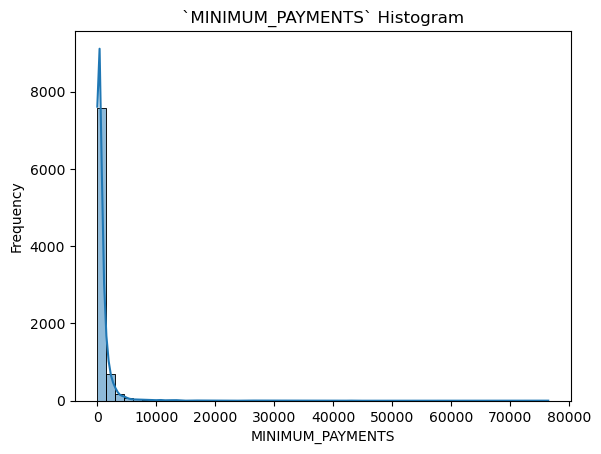

In [106]:
sns.histplot(df['MINIMUM_PAYMENTS'], bins=50, kde=True)
plt.title('`MINIMUM_PAYMENTS` Histogram')
plt.xlabel('MINIMUM_PAYMENTS')
plt.ylabel('Frequency')
plt.show()

In [107]:
min_value = df['MINIMUM_PAYMENTS'].min()
df['MINIMUM_PAYMENTS'].fillna(min_value, inplace=True)

In [108]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [109]:
df = df.dropna(subset=['CREDIT_LIMIT'], axis=0)

In [110]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Feature Engineering

In [111]:
df = df.drop(columns=['CUST_ID'])

In [81]:
df['ONEOFF_PURCHASE_RATIO'] = np.where(df['PURCHASES'] != 0,
                                       df['ONEOFF_PURCHASES'] / df['PURCHASES'], 0)

df['INSTALLMENT_PURCHASE_RATIO'] = np.where(df['PURCHASES'] != 0,
                                            df['INSTALLMENTS_PURCHASES'] / df['PURCHASES'], 0)

df['ADVANCE_RATIO'] = np.where((df['PURCHASES'] + df['CASH_ADVANCE']) != 0,
                               df['CASH_ADVANCE'] / (df['PURCHASES'] + df['CASH_ADVANCE']),
                               0)

df['PAYMENT_GAP'] = df['PAYMENTS'] - df['MINIMUM_PAYMENTS']
df['PAYMENT_RATIO'] = np.where(df['MINIMUM_PAYMENTS'] != 0,
                               df['PAYMENTS'] / df['MINIMUM_PAYMENTS'],
                               0)

df['PURCHASES_PER_TRX'] = np.where(df['PURCHASES_TRX'] != 0,
                                   df['PURCHASES'] / df['PURCHASES_TRX'],
                                   0)

df['ADVANCE_PER_TRX'] = np.where(df['CASH_ADVANCE_TRX'] != 0,
                                 df['CASH_ADVANCE'] / df['CASH_ADVANCE_TRX'],
                                 0)

df['ONEOFF_PURCHASE_FREQ_RATIO'] = np.where(df['PURCHASES_FREQUENCY'] != 0,
                                            df['ONEOFF_PURCHASES_FREQUENCY'] / df['PURCHASES_FREQUENCY'],
                                            0)

df['INSTALLMENT_PURCHASE_FREQ_RATIO'] = np.where(df['PURCHASES_FREQUENCY'] != 0,
                                                 df['PURCHASES_INSTALLMENTS_FREQUENCY'] / df['PURCHASES_FREQUENCY'],
                                                 0)

df['ADVANCE_FREQ_RATIO'] = np.where(df['PURCHASES_FREQUENCY'] != 0,
                                    df['CASH_ADVANCE_FREQUENCY'] / df['PURCHASES_FREQUENCY'],
                                    0)

print("\nFeature Engineering Complete. New columns added:")
print(df.columns)


Feature Engineering Complete. New columns added:
Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'ONEOFF_PURCHASE_RATIO', 'INSTALLMENT_PURCHASE_RATIO',
       'ADVANCE_RATIO', 'PAYMENT_GAP', 'PAYMENT_RATIO', 'PURCHASES_PER_TRX',
       'ADVANCE_PER_TRX', 'ONEOFF_PURCHASE_FREQ_RATIO',
       'INSTALLMENT_PURCHASE_FREQ_RATIO', 'ADVANCE_FREQ_RATIO'],
      dtype='object')


# Skewness Check

In [11]:
# Drop non-numeric columns if you only want to focus on numeric features
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
df_numeric = df.drop(columns=non_numeric_cols)

# List of numeric columns
numeric_cols = df_numeric.columns

In [ ]:
# Histograms and KDE
# 这个画图有点问题，到了payment_ratio的时候就需要很长时间，应该是skewnees大导致的
# print("=== Histograms + KDE Plots ===")
# for col in numeric_cols:
#    plt.figure(figsize=(6, 4))
#    sns.histplot(df[col], kde=True, color='blue')
#    plt.title(f"Distribution of {col}")
#    plt.show()

In [ ]:
# Boxplots
print("=== Boxplots ===")
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_numeric[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [12]:
not_skewed = ['purchases_frequency', 'purchases_installments_frequency', 'credit_limit']

In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
skewness_values = df[numeric_cols].apply(lambda x: skew(x.dropna()))
print("Skewness values:")
print(skewness_values)

Skewness values:
BALANCE                              2.392869
BALANCE_FREQUENCY                   -2.023854
PURCHASES                            8.142604
ONEOFF_PURCHASES                    10.042938
INSTALLMENTS_PURCHASES               7.297600
CASH_ADVANCE                         5.165457
PURCHASES_FREQUENCY                  0.059960
ONEOFF_PURCHASES_FREQUENCY           1.535196
PURCHASES_INSTALLMENTS_FREQUENCY     0.508938
CASH_ADVANCE_FREQUENCY               1.828338
CASH_ADVANCE_TRX                     5.720017
PURCHASES_TRX                        4.629717
CREDIT_LIMIT                         1.522209
PAYMENTS                             5.906475
MINIMUM_PAYMENTS                    13.805520
PRC_FULL_PAYMENT                     1.942316
TENURE                              -2.944294
ONEOFF_PURCHASE_RATIO                0.462193
INSTALLMENT_PURCHASE_RATIO           0.479633
ADVANCE_RATIO                        0.463567
PAYMENT_GAP                         -1.232374
PAYMENT_RATIO    

In [14]:
for col in numeric_cols:
    if abs(skewness_values[col]) > 1:
        # Ensure data is positive by shifting up if needed
        min_val = df[col].min()
        if min_val <= 0:
            shift = abs(min_val) + 1e-5
            df[col] = df[col] + shift

        # Apply log1p transform
        df[col] = np.log1p(df[col])

# 5. Check skewness again after transformation
skewness_after = df[numeric_cols].apply(lambda x: skew(x.dropna()))
print("\nSkewness AFTER transformation (only columns with |skewness|>1 changed):")
print(skewness_after)


Skewness AFTER transformation (only columns with |skewness|>1 changed):
BALANCE                             -0.861276
BALANCE_FREQUENCY                   -2.286395
PURCHASES                           -0.764715
ONEOFF_PURCHASES                     0.185620
INSTALLMENTS_PURCHASES              -0.025201
CASH_ADVANCE                         0.262712
PURCHASES_FREQUENCY                  0.059960
ONEOFF_PURCHASES_FREQUENCY           1.290245
PURCHASES_INSTALLMENTS_FREQUENCY     0.508938
CASH_ADVANCE_FREQUENCY               1.455241
CASH_ADVANCE_TRX                     0.939885
PURCHASES_TRX                        0.032534
CREDIT_LIMIT                        -0.101421
PAYMENTS                            -1.778782
MINIMUM_PAYMENTS                    -1.283189
PRC_FULL_PAYMENT                     1.745580
TENURE                              -3.171753
ONEOFF_PURCHASE_RATIO                0.462193
INSTALLMENT_PURCHASE_RATIO           0.479633
ADVANCE_RATIO                        0.463567
PAYMENT

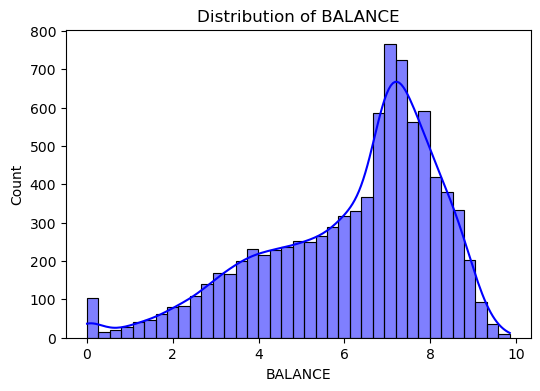

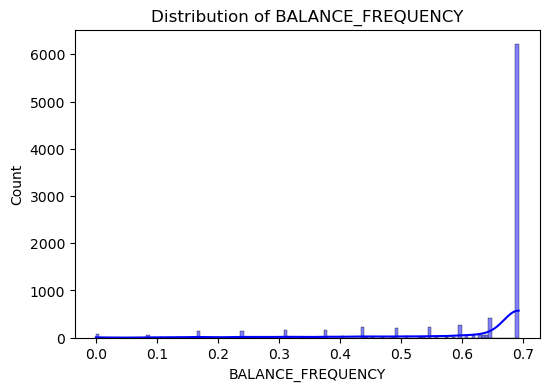

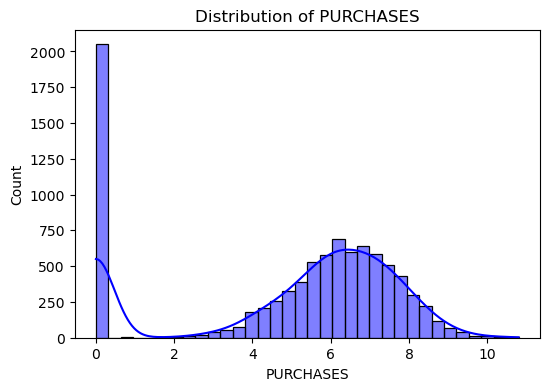

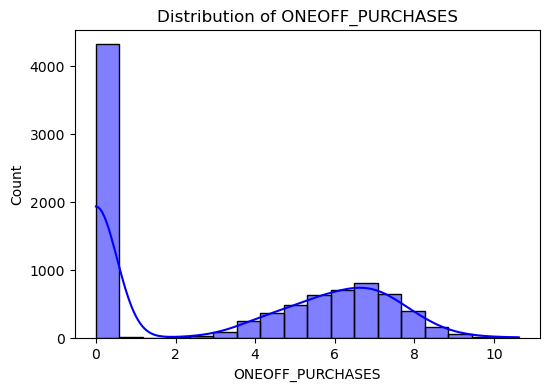

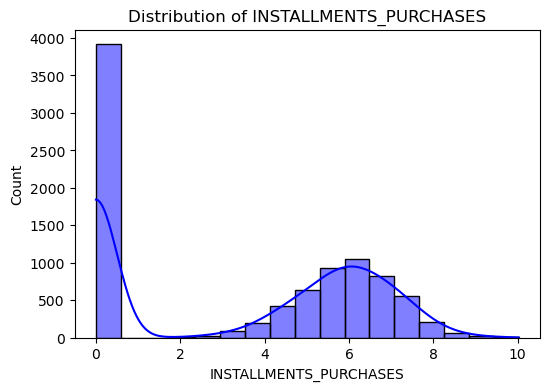

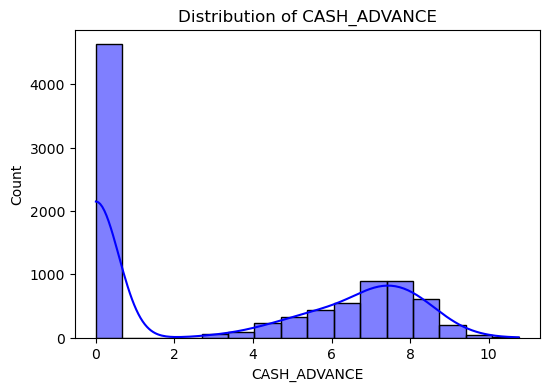

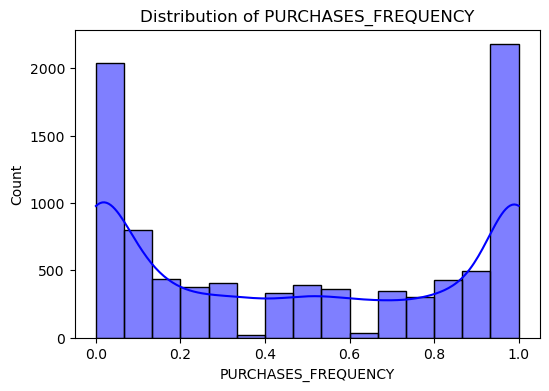

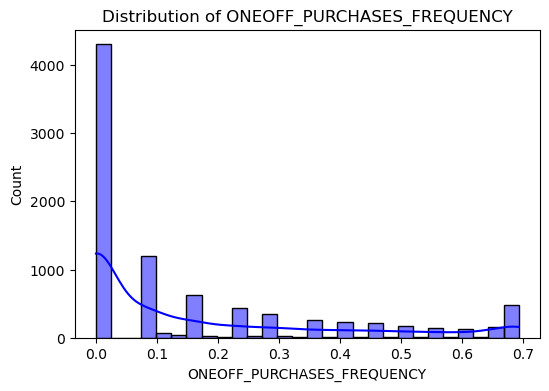

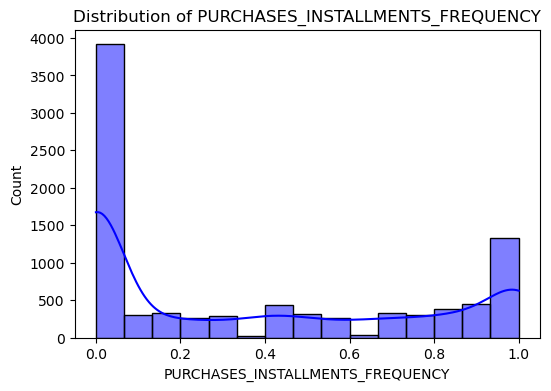

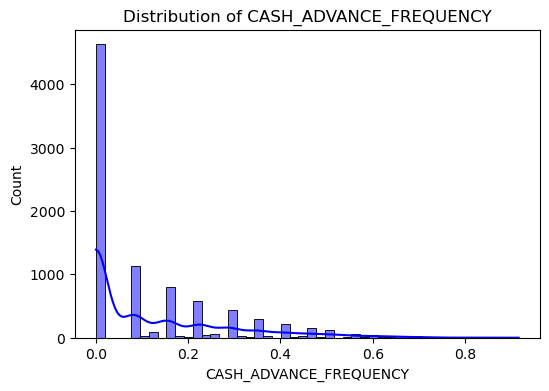

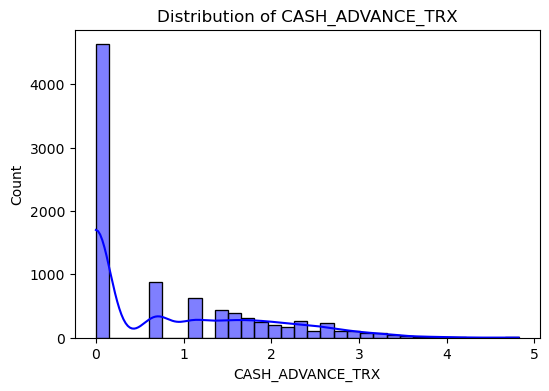

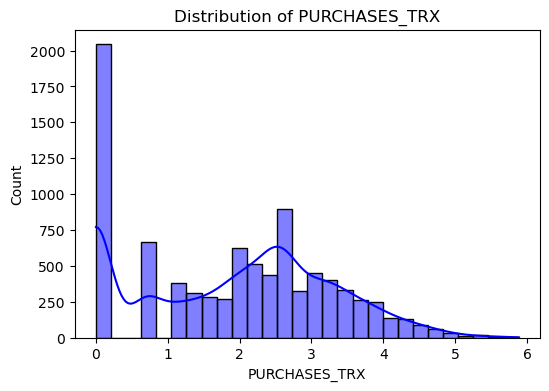

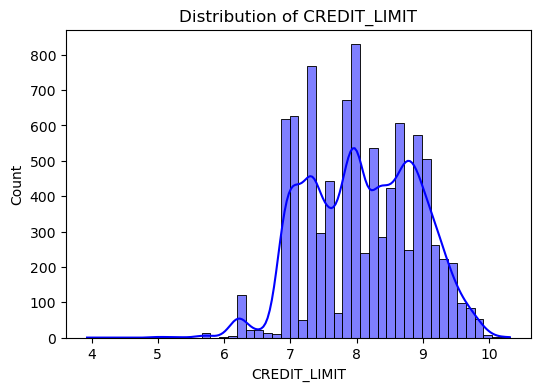

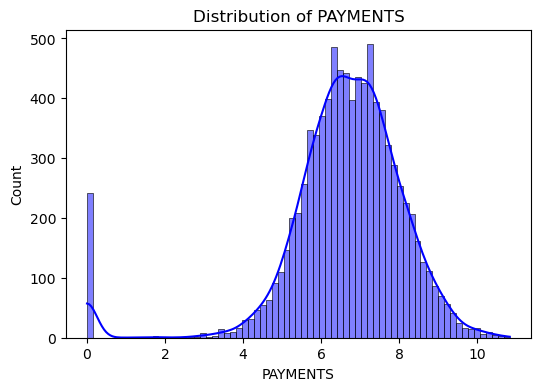

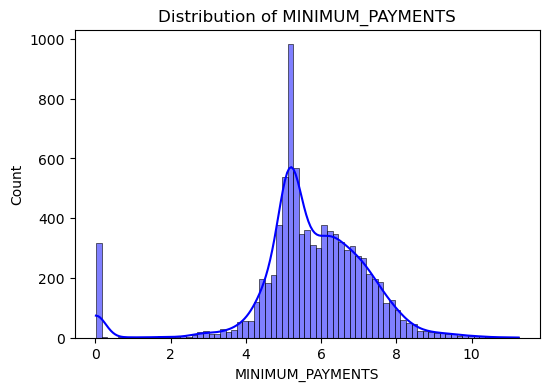

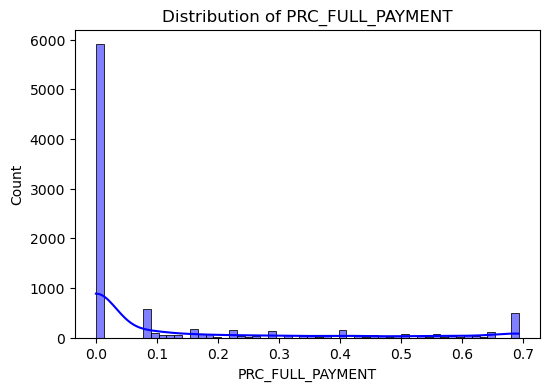

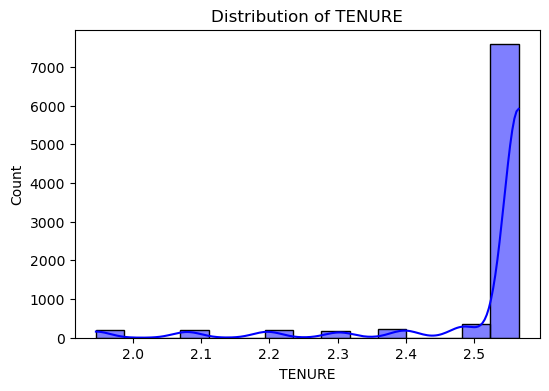

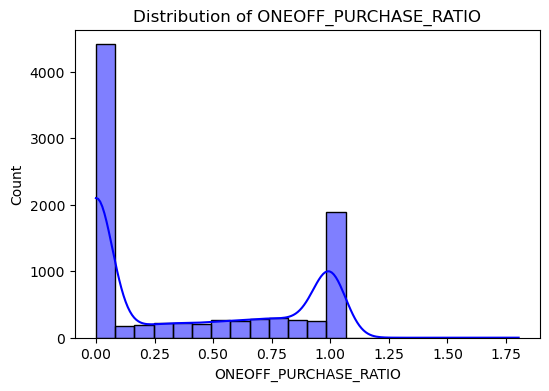

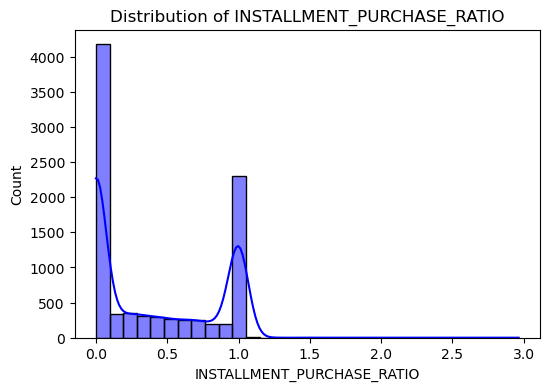

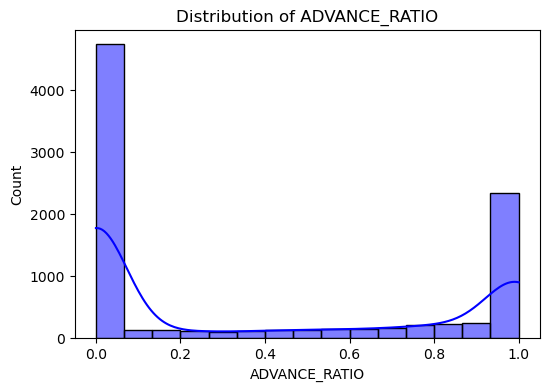

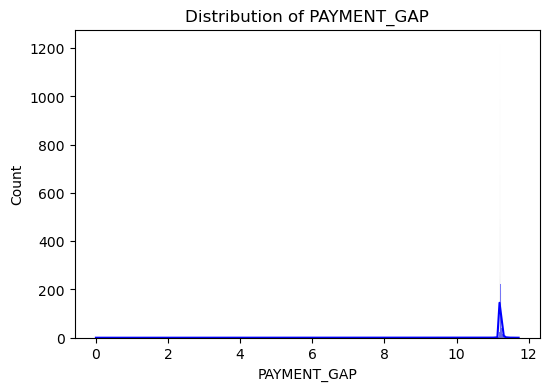

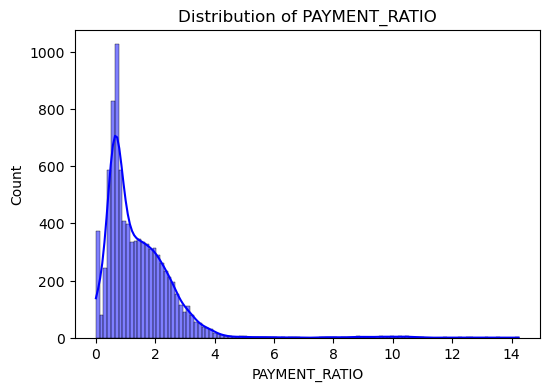

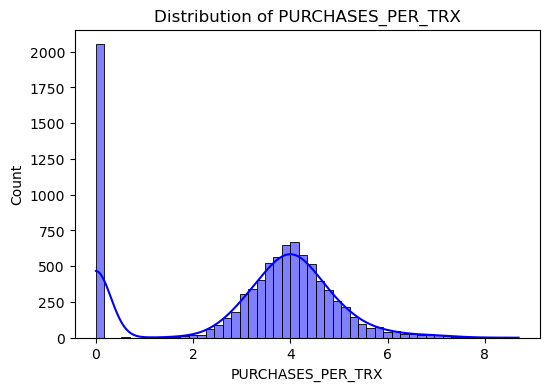

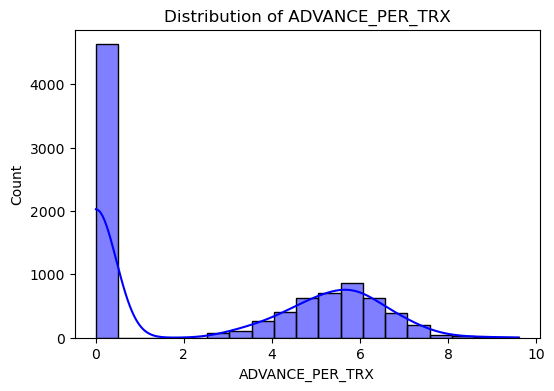

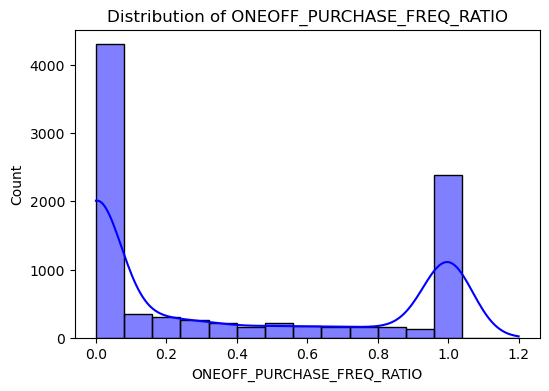

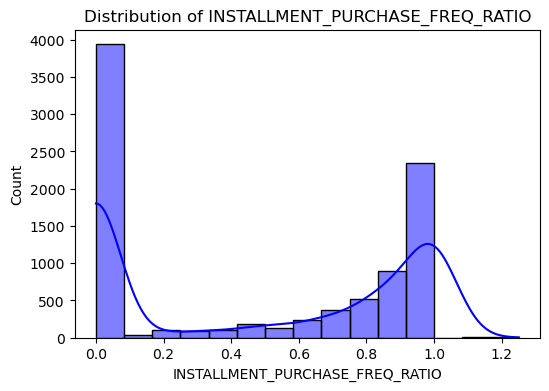

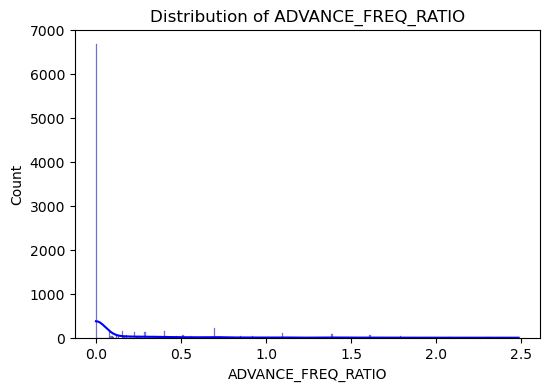

In [15]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

# Scaling

In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])

# K-Means Clustering

In [17]:
range_n_clusters = range(2, 20)
silhouette_scores = {}
inertia_values = {}

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    sil_score = silhouette_score(df_scaled, labels)
    inertia = kmeans.inertia_
    
    silhouette_scores[n_clusters] = sil_score
    inertia_values[n_clusters] = inertia
    
    print(f"Clusters: {n_clusters}, Silhouette Score: {sil_score:.4f}, Inertia: {inertia:.4f}")

Clusters: 2, Silhouette Score: 0.2796, Inertia: 178529.3742
Clusters: 3, Silhouette Score: 0.2719, Inertia: 149154.8873
Clusters: 4, Silhouette Score: 0.2849, Inertia: 127896.7665
Clusters: 5, Silhouette Score: 0.2730, Inertia: 115501.2195
Clusters: 6, Silhouette Score: 0.2919, Inertia: 105891.0167
Clusters: 7, Silhouette Score: 0.2929, Inertia: 98309.3850
Clusters: 8, Silhouette Score: 0.2970, Inertia: 92253.5974
Clusters: 9, Silhouette Score: 0.2836, Inertia: 89336.6660
Clusters: 10, Silhouette Score: 0.2212, Inertia: 85587.9782
Clusters: 11, Silhouette Score: 0.2597, Inertia: 81426.7016
Clusters: 12, Silhouette Score: 0.2560, Inertia: 77421.1927
Clusters: 13, Silhouette Score: 0.2390, Inertia: 75178.1660
Clusters: 14, Silhouette Score: 0.2557, Inertia: 72984.0213
Clusters: 15, Silhouette Score: 0.2560, Inertia: 70477.6495
Clusters: 16, Silhouette Score: 0.1995, Inertia: 67879.4303
Clusters: 17, Silhouette Score: 0.1952, Inertia: 66936.9359
Clusters: 18, Silhouette Score: 0.1936, Ine

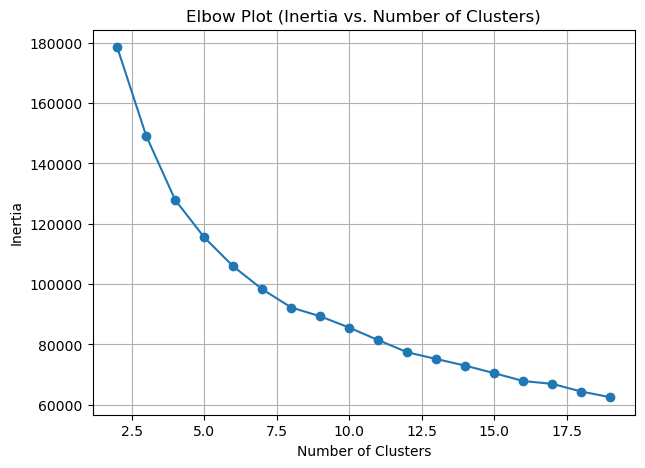

In [18]:
# Plot the Elbow Plot
plt.figure(figsize=(7, 5))
plt.plot(list(inertia_values.keys()), list(inertia_values.values()), marker='o')
plt.title("Elbow Plot (Inertia vs. Number of Clusters)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

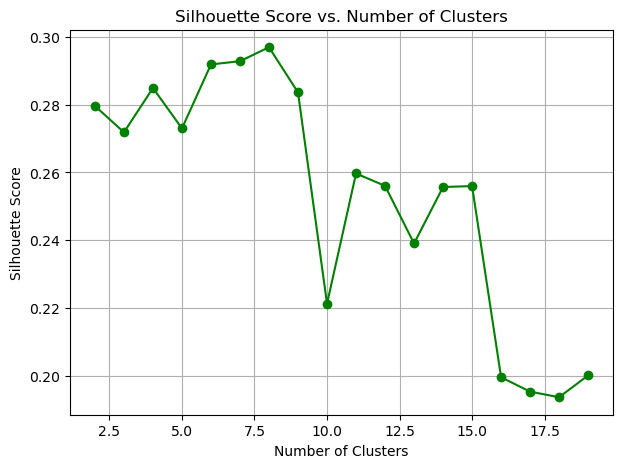

In [19]:
# Plot the Silhouette Score
plt.figure(figsize=(7, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', color='green')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [20]:
# Find the best number of clusters by silhouette score
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nOptimal number of clusters (based on silhouette): {optimal_clusters}")


Optimal number of clusters (based on silhouette): 8


# Final Clustering

In [21]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
final_labels = kmeans_optimal.fit_predict(df_scaled)

# Add cluster labels to the original dataframe for analysis
df['Cluster'] = final_labels

# PCA for 2D Visualization
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df_scaled)

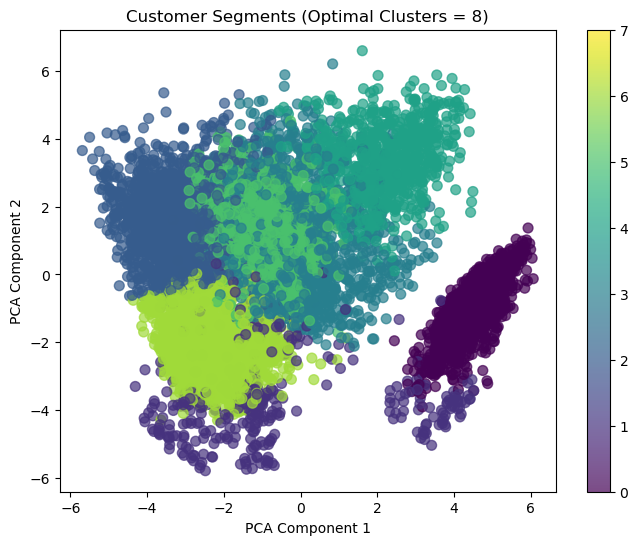

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=final_labels, cmap='viridis', s=50, alpha=0.7)
plt.title(f"Customer Segments (Optimal Clusters = {optimal_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

# Cluster Profiling

In [ ]:
print("\nCluster Centers (scaled features):")
print(kmeans_optimal.cluster_centers_)

# Mean values of each feature per cluster (unscaled)
cluster_means = df.groupby('Cluster').mean()
print("\nCluster-Wise Mean Values (unscaled data):")
print(cluster_means)

print("\n--- Pipeline Complete ---")


Cluster Centers (scaled features):
[[ 4.90014435e-01  1.39264154e-01 -1.67984586e+00 -9.87198327e-01
  -1.08604415e+00  1.00012103e+00 -1.22171764e+00 -7.32542474e-01
  -9.16557866e-01  7.70390629e-01  8.48554994e-01 -1.37825921e+00
  -1.16351819e-01  4.35846407e-02  2.94706494e-01 -3.86772327e-01
  -1.09741602e-01 -8.91419921e-01 -9.10927983e-01  1.39984262e+00
  -1.58201409e-02 -2.40552596e-01 -1.67176813e+00  1.00925528e+00
  -8.63449663e-01 -1.05832471e+00 -4.11777381e-01]
 [-2.13146281e+00 -2.96381358e+00 -3.12074184e-01 -6.38059599e-01
  -4.99008494e-02 -5.54582496e-01 -4.44393700e-01 -5.97212500e-01
  -2.37801493e-01 -5.68902449e-01 -5.94003684e-01 -4.55743346e-01
  -2.62967592e-01 -2.00192119e+00 -2.61048247e+00 -2.77663523e-01
  -2.98935838e-01 -4.38623959e-01  5.45337478e-01 -3.95253722e-01
  -3.07894589e-02  1.13592236e+00 -6.97797728e-02 -4.93546921e-01
  -4.32453073e-01  2.92199746e-01 -3.58598134e-01]
 [ 2.36560081e-01  3.95502474e-01  9.85810178e-01  1.23376101e+00
   1